<a href="https://colab.research.google.com/github/songaong8006/classifier/blob/main/for_export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.1MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 63.9MB/s 
     |████████████████████████████████| 194kB 39.3MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'cde11e5586cb4e9e9f52586c2403588e')

In [4]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
for q in ["adidas shoes", "nike shoes", "reebok shoes"]:
    downloader.download(q, limit=1000, output_dir='shoes', adult_filter_off=True, force_replace=False, timeout=5)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[%] File Downloaded !

[%] Downloading Image #544 from https://www.tennisnuts.com/images/product/full/g_Nike-Free-50-Mens-Running-Shoe-642198_061_A_PREM.jpg
[%] File Downloaded !

[%] Downloading Image #545 from https://footwearprice.com/storage/2018/11/70e4b42f-14b7-4270-b487-72d2d865e1f11529300515126-Nike-Flex-RN-2018-471529300515041-5.jpg
[%] File Downloaded !

[%] Downloading Image #546 from https://n3.sdlcdn.com/imgs/a/l/3/Nike-Black-Sport-Shoes-SDL303206035-1-63b0b.jpg
[%] File Downloaded !

[%] Downloading Image #547 from http://khelmart.com/Cricket/zoomer_Image/NK_BS_00005_large.jpg
[%] File Downloaded !

[%] Downloading Image #548 from https://n3.sdlcdn.com/imgs/h/w/7/Nike-1-Air-270C-Running-SDL575366957-2-43229.jpeg
[%] File Downloaded !

[%] Downloading Image #549 from http://www.fashionkidunia.com/wp-content/uploads/2018/05/nike-shoes-6.jpg
[%] File Downloaded !

[%] Downloading Image #550 from https://www.tennisnuts.com/images/product/fu

In [5]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
shoes_types = 'nike','adidas','reebok'
path = Path('shoes')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in shoes_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} shoes')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [7]:
fns = get_image_files(path)
fns

(#3000) [Path('shoes/nike shoes/Image_503.jpeg'),Path('shoes/nike shoes/Image_264.jpeg'),Path('shoes/nike shoes/Image_427.jpg'),Path('shoes/nike shoes/Image_414.jpg'),Path('shoes/nike shoes/Image_401.jpg'),Path('shoes/nike shoes/Image_270.jpg'),Path('shoes/nike shoes/Image_882.jpg'),Path('shoes/nike shoes/Image_730.jpg'),Path('shoes/nike shoes/Image_946.jpg'),Path('shoes/nike shoes/Image_206.jpeg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink);

In [10]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = shoes.dataloaders(path)

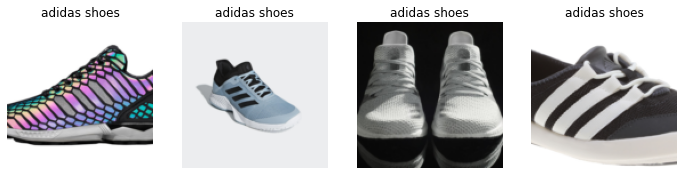

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

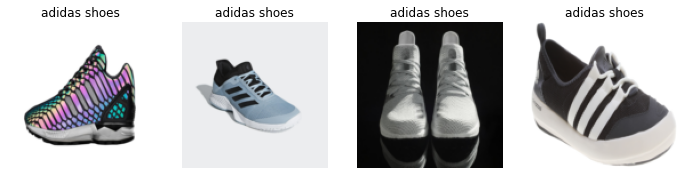

In [13]:
shoes = shoes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

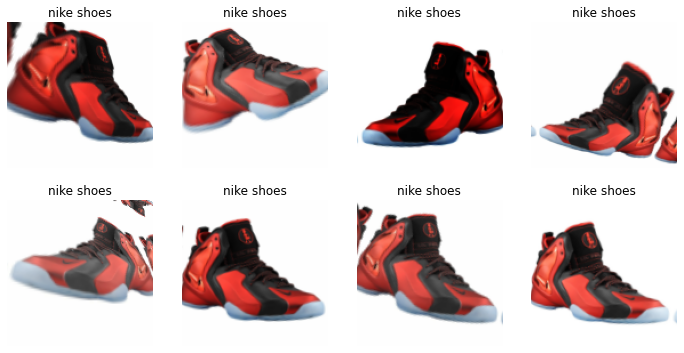

In [14]:
shoes = shoes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [15]:
shoes = shoes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,1.131519,0.418235,0.153333,01:51


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.480203,0.215911,0.065000,01:51
1,0.352632,0.142258,0.043333,01:51
2,0.258249,0.082352,0.025000,01:51
3,0.187141,0.058247,0.015000,01:51
4,0.142749,0.030696,0.011667,01:51
5,0.107318,0.022470,0.011667,01:51
6,0.083022,0.022430,0.011667,01:52
7,0.059639,0.011640,0.005000,01:53
8,0.051213,0.013217,0.003333,01:52
9,0.045696,0.015227,0.005000,01:51


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

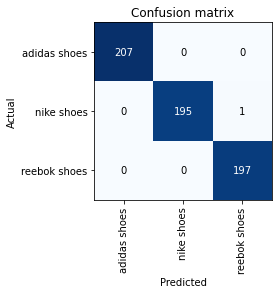

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

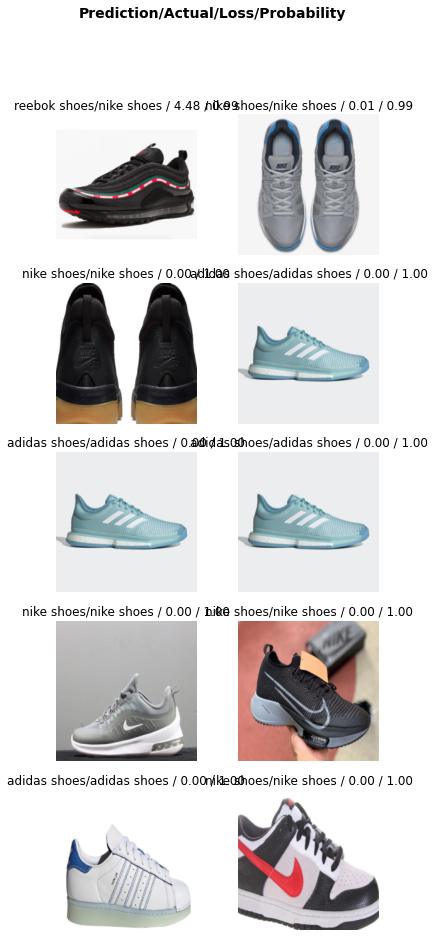

In [20]:
interp.plot_top_losses(10, nrows=5)

In [21]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [30]:
learn_inf.dls.vocab

['adidas shoes', 'nike shoes', 'reebok shoes']